# Solving checker game, using minimax algorithm

## Goal:

in this project, we are about to implement the checker game problem using minimax methods and algorythm.

## Discription:

firs we would complete each part of the code wich has to be completed and we would desscribe about each of them, and talk about how and why we implemented these function as so. after describing all these functions, we would give a complete description of the evaluation function for this problem and how it works and why it is defined in this way. at last we are about to test our code using the testcases given in the problem dicription and analysis them.

In [1]:
    def getValidMoves(self, piece):
        moves = {}

        if piece.color == RED or piece.king:
            moves.update(self._traverseLeft(piece.row - 1, max(piece.row - 3, -1), -1, piece.color, piece.col - 1))
            moves.update(self._traverseRight(piece.row - 1, max(piece.row - 3, -1), -1, piece.color, piece.col + 1))

        if piece.color == WHITE or piece.king:
            moves.update(self._traverseLeft(piece.row + 1, min(piece.row + 3, ROWS), 1, piece.color, piece.col - 1))
            moves.update(self._traverseRight(piece.row + 1, min(piece.row + 3, ROWS), 1, piece.color, piece.col + 1))

        return moves

getValidMoves function that exists in board.py file, has to be implement in the way that it could return all possible moves for each piece besed on it color and situation.  so for implimenting this function we should consider 2 conditions. the first one is the color of each piece, if the piece is red. it can only goes down and if it is white it can only moves up(unless they are king). first condition is our piece being a king. if so it can both moves up and down(diagonal). now we append all traverseLeft and traverseRight moves. these moves are the moves wich start with the pieces goes left or right.(considering all possible moves.), the first parameter passed to these function is start, wich is the row that pieces would start their journey wich is the row that they are traveling to at the first step and this is different for red and white.(red goes to lower row and white goes to higher row.) next these functions get the piece's stop parameter wich is the maximum moves that each piece can move to. wich is rather the end of the bord for that piece or 2 row lower (considering the double jump.) or higher depend on piece color. next thet get step, wich is the max step in each movement and considering the piese's color and their legal direction of movements wich for red is -1 and for white is +1. next, it is the color of the piece. and at last it would get an array of skipped pieses columns indexes wich at first it is only either the piece left side or right side wuch is either piece.col - 1 or piece.col + 1.

In [ ]:
def minimax(position, depth, maxPlayer, game):

    if depth == 0 or position.winner() != None:
        return position.evaluate(), position

    if maxPlayer == True:
        maxEval = float("-inf")
        best_move = None
        for move in getAllMoves(position, WHITE, game):
            evaluation = minimax(move, depth - 1, False, game)[0]
            maxEval = max(maxEval, evaluation)
           
            if maxEval == evaluation:
                best_move = move

        return maxEval, best_move

    else:
        minEval = float("inf")
        best_move = None
        for move in getAllMoves(position, RED, game):
            evaluation = minimax(move, depth - 1, True, game)[0]
            minEval = min(minEval, evaluation)
            
            if minEval == evaluation:
                best_move = move

        return minEval, best_move

In [2]:
def simulateMove(piece, move, board, game, skip):
    board.move(piece, move[0], move[1])
    if skip:
        board.remove(skip)
    return board

simulateMove function is implemented to check if there exists any skipped pieses in this round, and if so remove them from the board so as we said first we check if the skip array isnt empty and then we would remove all of the elements in skip arrat and then return the final board.

In [ ]:
def getAllMoves(board, color, game):
    moves = []   
    for piece in board.getAllPieces(color):
        valid_moves = board.getValidMoves(piece)

        for move, skip in valid_moves.items():
            previous_board = deepcopy(board)
            previous_piece = previous_board.getPiece(piece.row, piece.col)
            new_board = simulateMove(previous_piece, move, previous_board, game, skip)
            moves.append(new_board)

    return moves

getAllMoves() function is implemented to return all possible moves for each player. for doing so it has to get all valid moves over all pieces.

### Test 1: 
**red debth = 1**

**white debth = 1**

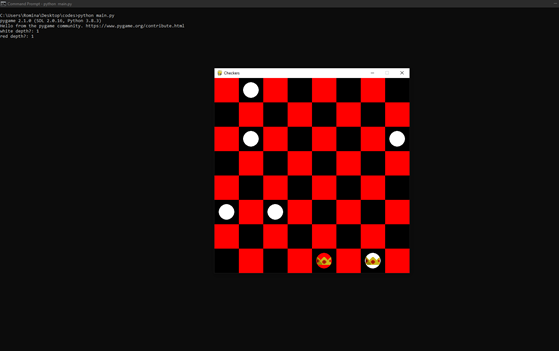 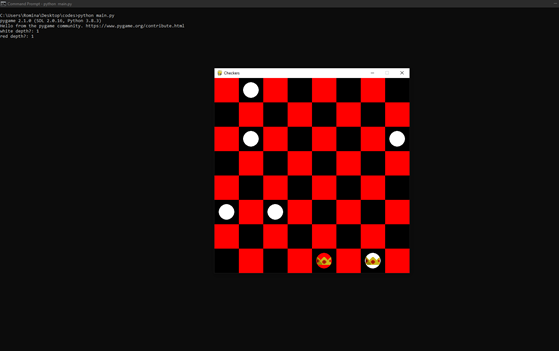

as we run the main.py file, we could see that in less than seconds the geme came up to the situation that is showed aboved but then the game stucked in a loop. it is not an invalid operation to get stucked in a same situation and doind the same works but it is not efficient. as we can see white is in a better situation than red player. but anytime red wants to move white king moves in a way that it can beat red so the red piece come back to its situation and they get stuck in a loop. we can say some how white player has a board strategy in the same situation of knowledge and experience.

### Test 2: 1)
**red debth = 2**

**white debth = 5**

!
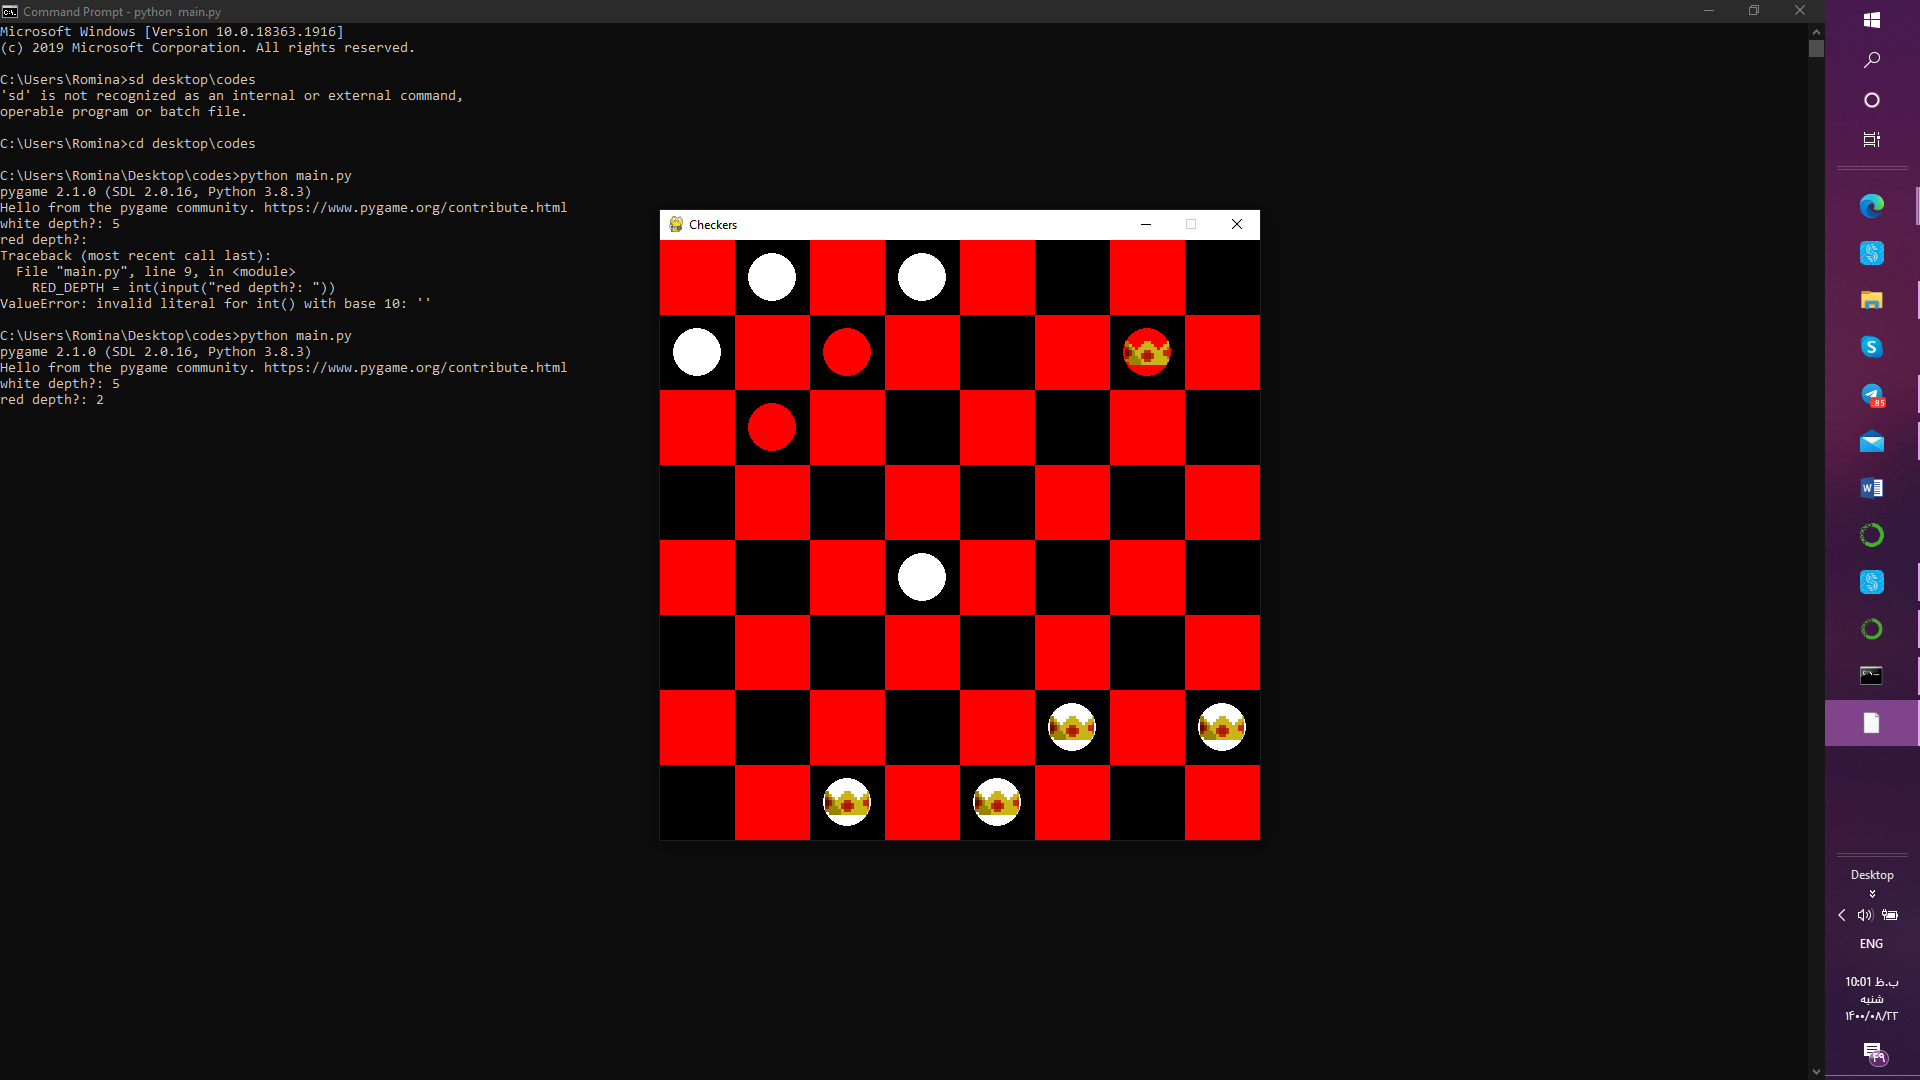 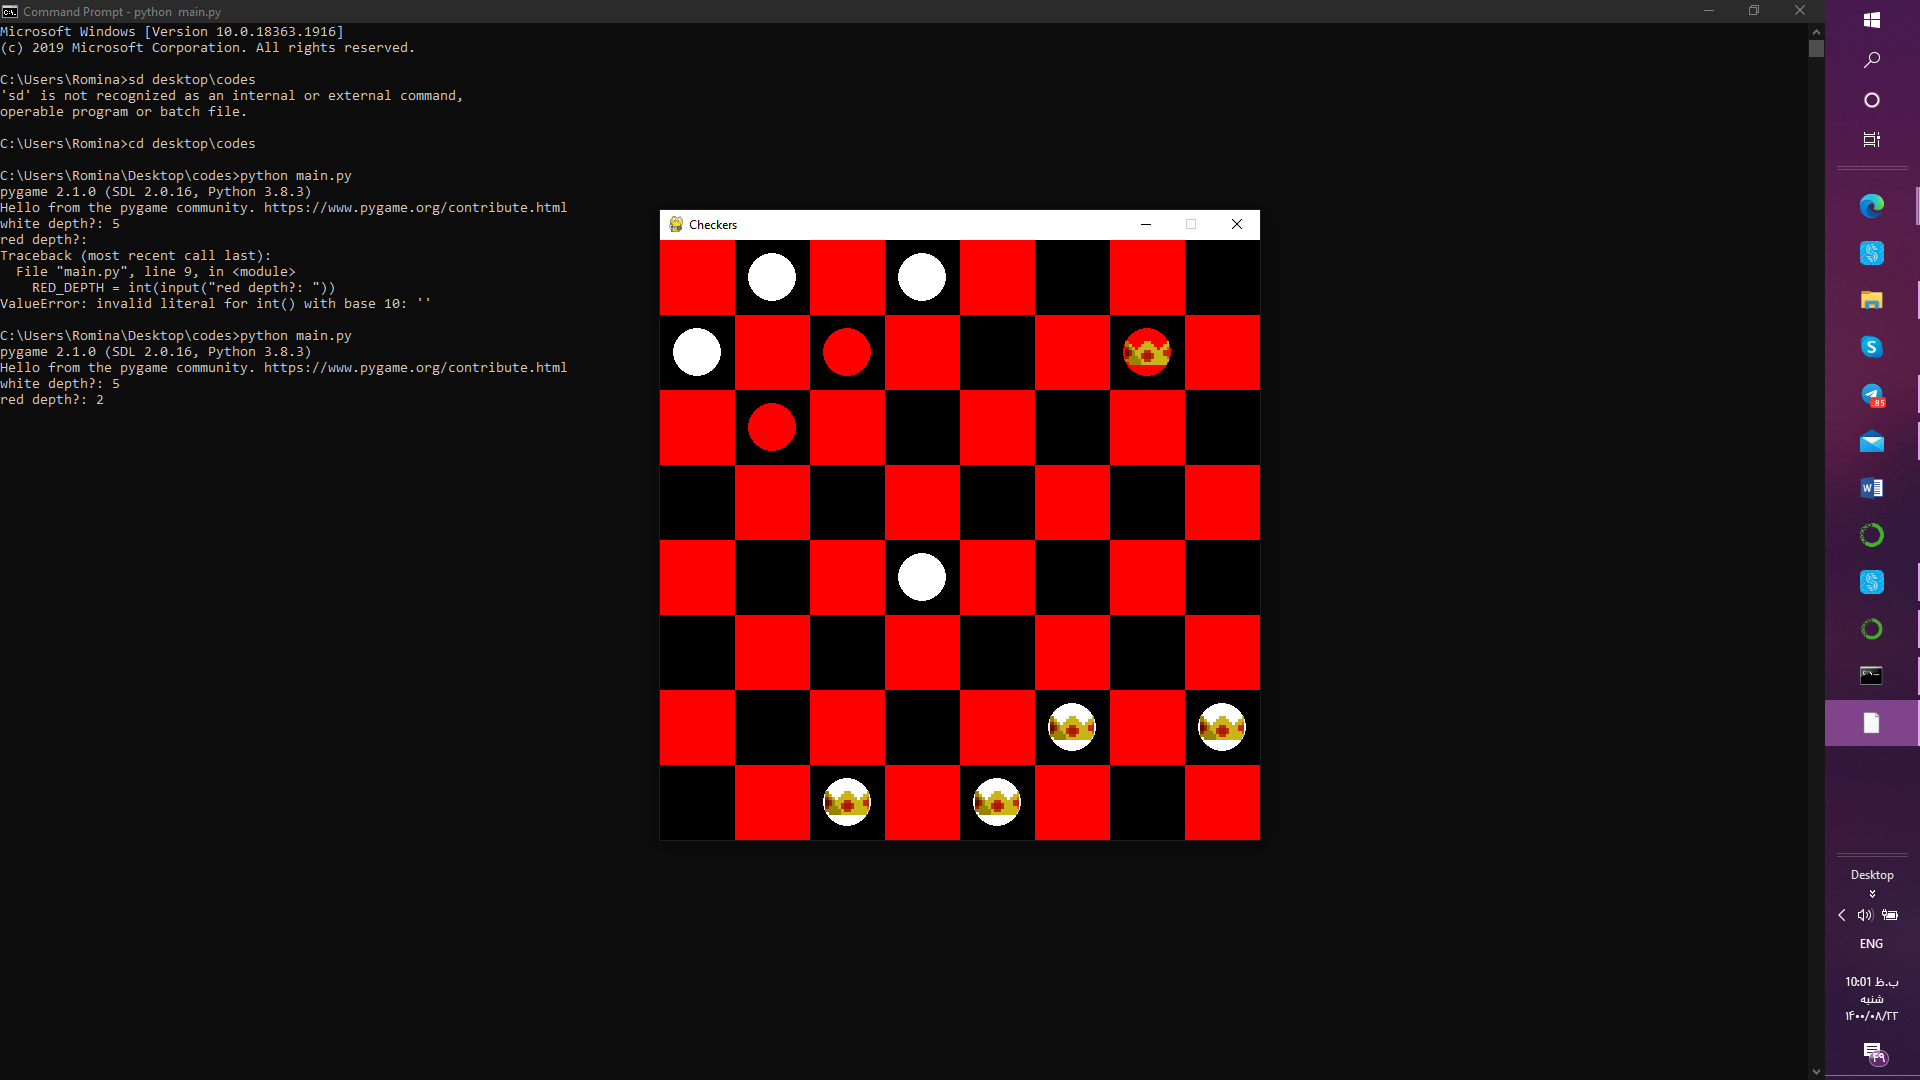

## Result : 

although minimax algorithms are a good algorithm to find the bst movement an winning a game. but these algorythms, because they are using max depth and max limited depth for searching the best  

## Rfrences:

1-https://discourse.jupyter.org/t/how-to-work-with-pure-python-file-py/4443